# Author: Santhi Sampath


## Student Marks Prediction with Linear Regression

### Task 1: Prediction using Supervised Machine Learning

---------------------------------

*In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. We use the data available at http://bit.ly/w-data.*

----

## Importing required libraries:

In [25]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and Preparing Data:

In [26]:
#Importing the dataset
data = pd.read_csv("Student score dataset.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
print('Shape of the dataset is: ', data.shape)

Shape of the dataset is:  (25, 2)


In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
# Checking for Null values.

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are No Null values in the given dataset.

In [12]:
# Creating two variables X and y to hold hour and score values for regression:

X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

In [13]:
# Creating a train test split in the ratio 80:20 to evaluate data:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Visualizing Data:

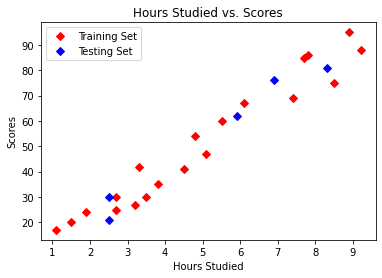

In [14]:
# Plotting data to understand relationship between the variables:

plt.plot(X_train, y_train, 'rD', label = 'Training Set')
plt.plot(X_test, y_test, 'bD', label = 'Testing Set')
plt.legend()
plt.title('Hours Studied vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

**Linear Regression:** Linear regression is a way to explain the relationship between a dependent variable and one or more explanatory variables using a straight line.

A line can be represented as **y = mx + b**, where m is the slope of the line and b is the y-intercept, for a regression line:

$$m = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$$$b = \bar{y} - m\bar{x}$$$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$$$\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$$

In [15]:
# defining mean, slope, intercept
def mean(list):
    return float(sum(list))/len(list)

def slope(X_train, y_train, X_mean, y_mean):
    return sum((X_train - X_mean) * (y_train - y_mean))/sum((X_train - X_mean) ** 2)

def intercept(X_mean, y_mean, m):
    return y_mean - m * X_mean

In [16]:
X_mean = mean(X_train)
y_mean = mean(y_train)
m = slope(X_train[:, 0], y_train, X_mean, y_mean)
b = intercept(X_mean, y_mean, m)
print('Slope, m: ', m)
print('Intercept, b: ', b)

Slope, m:  9.682078154455699
Intercept, b:  2.826892353899737


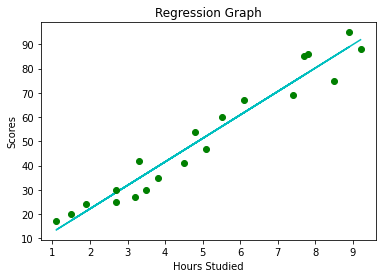

In [17]:
# Plotting the regression line
plt.plot(X_train, X_train * m + b, 'c-')

# Plotting the data points from training set
plt.plot(X_train, y_train, 'go')
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

## Linear regression using scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print ("Slope: ", regressor.coef_[0])
print ("Intercept: ", regressor.intercept_)

Slope:  9.682078154455697
Intercept:  2.826892353899737


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


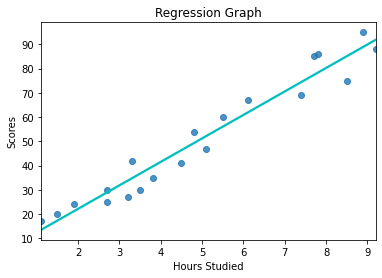

In [19]:
sns.regplot(X_train, y_train, ci = None, line_kws={'color':'c'})
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [20]:
print('The error between slope of our model and scikit-learn\'s model: ', abs(regressor.coef_[0] - m))
print('The error between intercept of our model and scikit-learn\'s model: ', abs(regressor.intercept_ - b))

The error between slope of our model and scikit-learn's model:  1.7763568394002505e-15
The error between intercept of our model and scikit-learn's model:  0.0


We can see here that the regression model built is very close to the in-built scikit-learn model

## Predictions and Evaluation:

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Hours,Actual Score,Predicted Score
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


In [23]:
# Checking model for an arbitary data as input:

print('Number of hours: 9.65')
print('Predicted score: ', regressor.predict([[9.65]])[0])

Number of hours: 9.65
Predicted score:  96.25894654439722


In [24]:
# Evaluating model accuracy:

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288
R2 Value: 0.9678055545167994


This model has an accuracy of **96.78%**
----------------------

Thank you